In [1]:
import pickle
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

In [2]:
embeddings = pickle.load(open("Data/Embeddings/CIFAR/CIFAR_100_word_to_embedding_wordnet.pk", 'rb'), encoding='latin1')

In [3]:
labels = embeddings.keys()
X = np.array([embeddings[label] for label in labels])
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)
pca_embeddings = {}
for i, label in enumerate(labels):
    pca_embeddings[label] = X_r[i, :]

In [17]:
superclasses = {
    "aquatic mammals":["beaver", "dolphin", "otter", "seal", "whale"],
    "fish": ["aquarium fish", "flatfish", "ray", "shark", "trout"],
    "flowers": ["orchid", "poppy", "rose", "sunflower", "tulip"],
    "food containers": ["bottle", "bowls", "can", "cup", "plate"],
    "fruit and vegetables": ["apple", "mushroom", "orange", "pear", "pepper"],
    "household electrical devices": ["clock", "keyboard", "lamp", "telephone", "television"],
    "household furniture": ["bed", "chair", "couch", "table", "wardrobe"],
    "insects": ["bee", "beetle", "butterfly", "caterpillar", "cockroach"],
    "large carnivores": ["bear", "leopard", "lion", "tiger", "wolf"],
    "large man-made outdoor things": ["bridge", "castle", "house", "road", "skyscraper"],
    "large natural outdoor scenes": ["cloud", "forest", "mountain", "plain", "sea"],
    "large omnivores and herbivores": ["camel", "cattle", "chimpanzee", "elephant", "kangaroo"],
    "medium-sized mammals": ["fox", "porcupine", "possum", "raccoon", "skunk"],
    "non-insect invertebrates": ["crab", "lobster", "snail", "spider", "worm"],
    "people": ["baby", "boy", "girl", "man", "woman"],
    "reptiles": ["crocodile", "dinosaur", "lizard", "snake", "turtle"],
    "small mammals": ["hamster", "mouse", "rabbit", "shrew", "squirrel"],
    "trees": ["maple", "oak", "palm", "pine", "willow"],
    "vehicles 1": ["bicycle", "bus", "motorcycle", "pickup_truck", "train"],
    "vehicles 2": ["lawn_mower", "rocket", "streetcar", "tank", "tractor"]
}
#print(labels)
super_class_labels = []
sc_data = {}
for superclass in superclasses.keys():
    sc_data[superclass] = []
    for label in superclasses[superclass]:
        sc_data[superclass].append(pca_embeddings[label])

In [37]:
to_include = [
         #'aquatic mammals', 
           #'fish', 
           #'flowers', 
           'food containers', 
           #'fruit and vegetables', 
           #'household electrical devices', 
           #'household furniture', 
           #'insects', 
           'large carnivores', 
           #'large man-made outdoor things', 
           #'large natural outdoor scenes', 
           #'large omnivores and herbivores', 
           'medium-sized mammals', 
           #'non-insect invertebrates', 
           #'people', 
           'reptiles', 
           'small mammals', 
           'trees', 
           'vehicles 1', 
           'vehicles 2'
          ]

food containers [-0.3217278  -0.3819906  -0.32346067 -0.23145103 -0.36824548]
food containers [ 0.48203897 -0.09505149  0.4797255   0.2675911  -0.28610575]
large carnivores [0.8278902 0.8278901 0.8278901 0.8278901 0.8278909]
large carnivores [-0.01349671 -0.01349602 -0.01349601 -0.01349601 -0.01349723]
medium-sized mammals [-0.32208556 -0.37485883  0.8279103   0.8278895  -0.42663935]
medium-sized mammals [ 0.48514634 -0.22411948 -0.0135395  -0.01349674  0.28816184]
reptiles [ 0.82774806 -0.37614498 -0.37614033  0.82774895 -0.3220856 ]
reptiles [-0.01361993 -0.21170078 -0.21169154 -0.01362303  0.48514637]
small mammals [ 0.8278896  -0.37485918 -0.3220856   0.82789314  0.82789   ]
small mammals [-0.01349614 -0.22411527  0.48514637 -0.01350266 -0.01349674]
trees [-0.3873822  -0.3873838  -0.3909471  -0.36562696 -0.3651755 ]
trees [-0.09506626 -0.09506504 -0.08081384 -0.29218388 -0.29152444]
vehicles 1 [-0.36861938 -0.3350962  -0.3686326  -0.36858165 -0.32208517]
vehicles 1 [-0.28568092 -0.

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


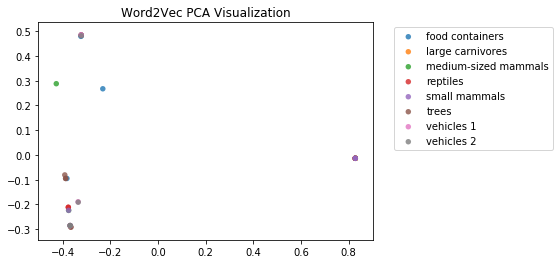

In [38]:
#print(sc_data)
# Create plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1, axisbg="1.0")
for sc in sc_data:
    if not sc in to_include:
        continue
    sc_data[sc] = np.array(sc_data[sc])
    x = sc_data[sc][:, 0]
    y = sc_data[sc][:, 1]
    print(sc, x)
    print(sc, y)
    ax.scatter(x, y, alpha=0.8, marker='o', edgecolors='none', s=30, label=sc)
 
plt.title('Word2Vec PCA Visualization')
plt.legend(loc=9, bbox_to_anchor=(1.3, 1.0))
plt.show()